In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\point\Desktop\garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [9]:
df.shape


(1197, 15)

In [11]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [13]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [15]:
df = df.dropna()

In [17]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

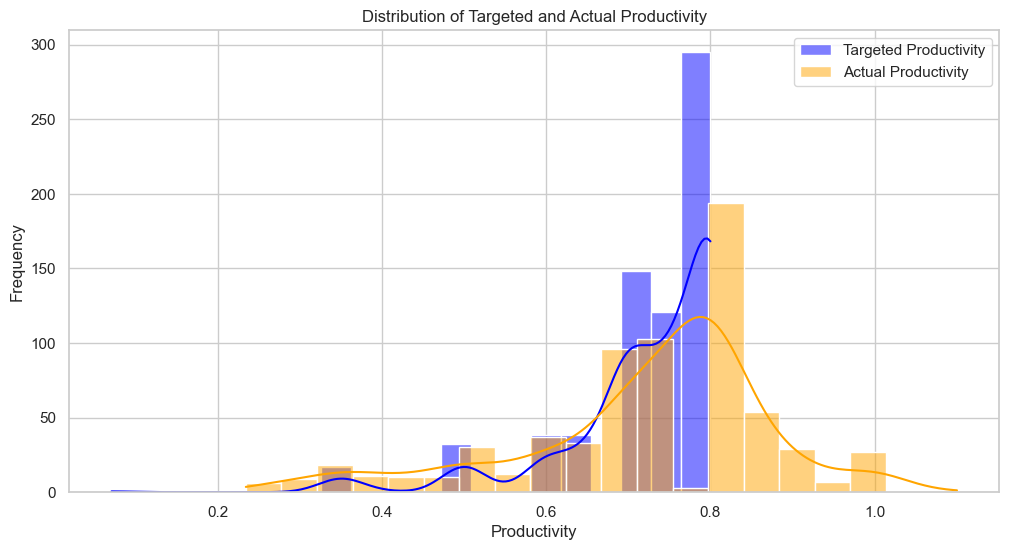

In [21]:
sns.set(style="whitegrid")

# Histogram for Targeted and Actual Productivity
plt.figure(figsize=(12, 6))
sns.histplot(df['targeted_productivity'], bins=20, color='blue', label='Targeted Productivity', kde=True)
sns.histplot(df['actual_productivity'], bins=20, color='orange', label='Actual Productivity', kde=True)
plt.title('Distribution of Targeted and Actual Productivity')
plt.xlabel('Productivity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

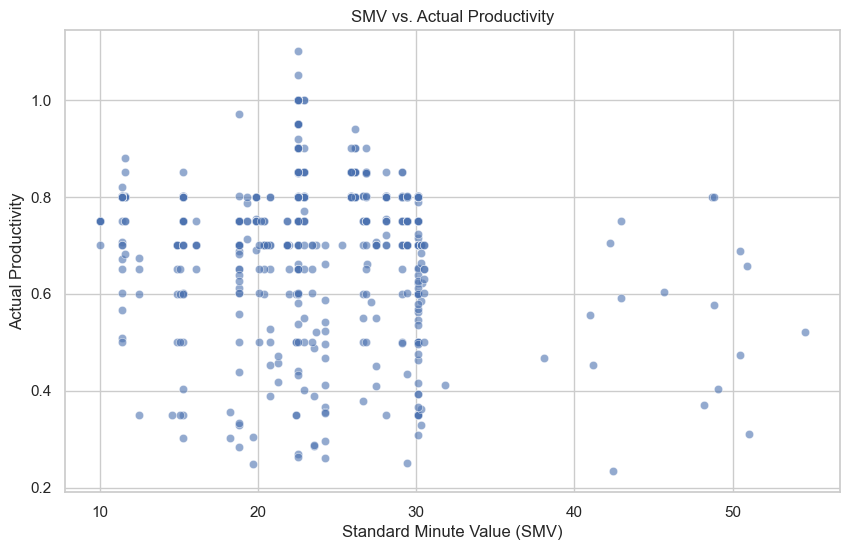

In [23]:
# Scatter Plot for SMV vs. Actual Productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='smv', y='actual_productivity', data=df, alpha=0.6)
plt.title('SMV vs. Actual Productivity')
plt.xlabel('Standard Minute Value (SMV)')
plt.ylabel('Actual Productivity')
plt.show()

C:\Users\point\AppData\Local\Temp\ipykernel_17540\2554688147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quarter', y='actual_productivity', data=df, palette='Set2')


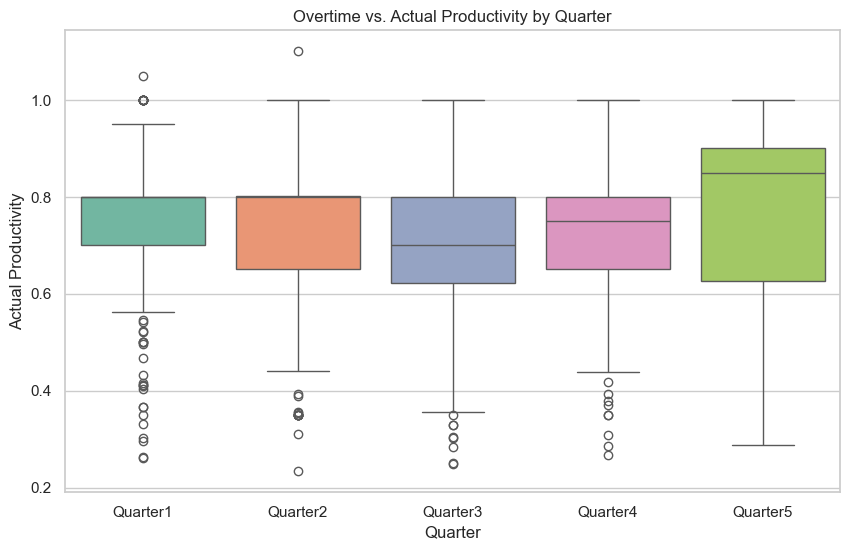

In [25]:
# Box Plot for Overtime vs. Actual Productivity
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='actual_productivity', data=df, palette='Set2')
plt.title('Overtime vs. Actual Productivity by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.show()

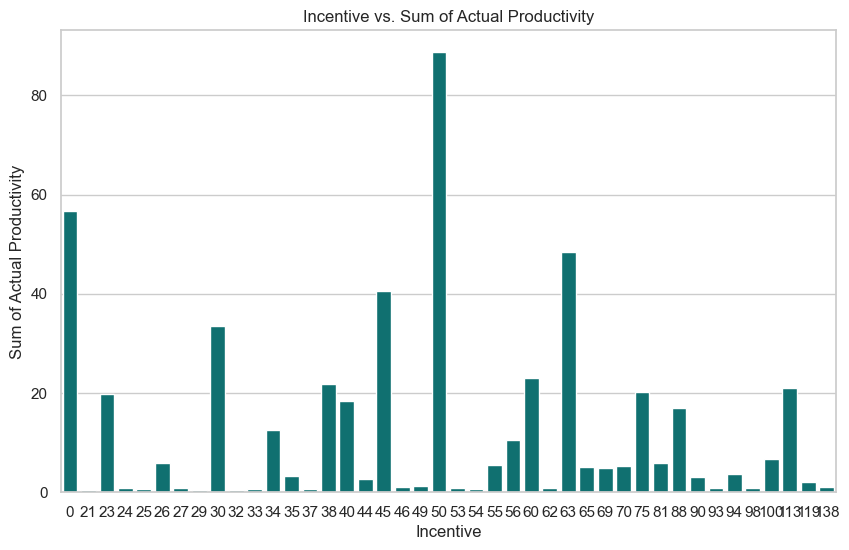

In [29]:
# Bar Plot for Incentive vs. Actual Productivity
plt.figure(figsize=(10, 6))
sns.barplot(x='incentive', y='actual_productivity', data=df, errorbar=None, estimator=sum, color='teal')
plt.title('Incentive vs. Sum of Actual Productivity')
plt.xlabel('Incentive')
plt.ylabel('Sum of Actual Productivity')
plt.show()

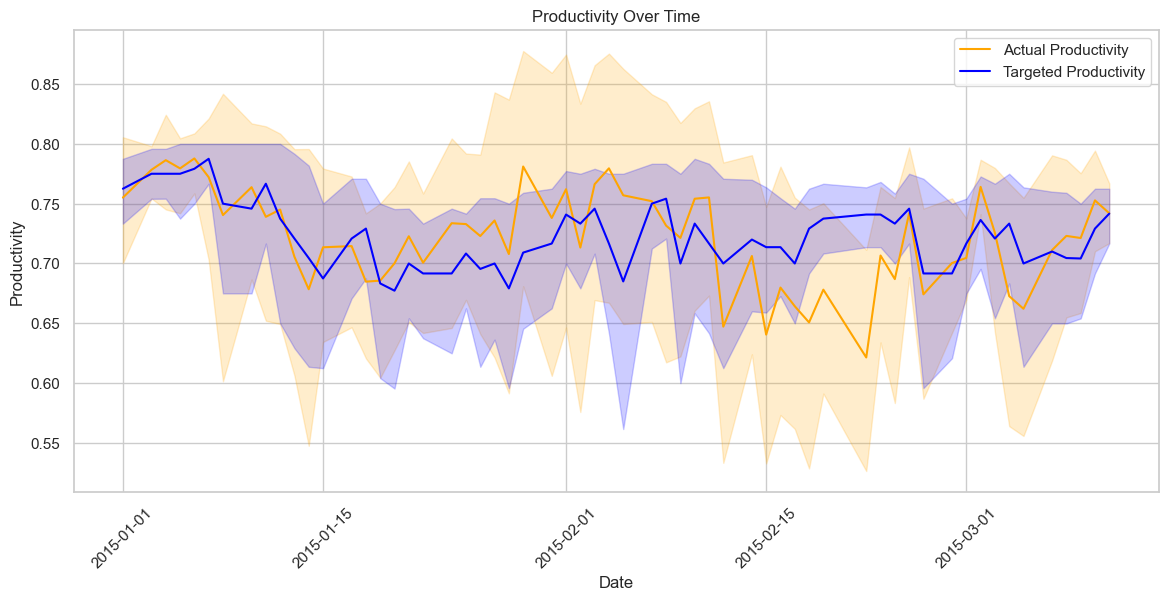

In [31]:
# Convert 'date' to datetime for time series plot
df['date'] = pd.to_datetime(df['date'])

# Line Plot for Productivity Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='actual_productivity', data=df, label='Actual Productivity', color='orange')
sns.lineplot(x='date', y='targeted_productivity', data=df, label='Targeted Productivity', color='blue')
plt.title('Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# Create a copy of the dataset to preserve the original data
data_encoded = df.copy()

In [86]:
# Convert string columns to integers using Label Encoding
label_encoders = {}
for column in ['quarter', 'department', 'date']:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

In [42]:
# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

In [44]:
# Display the correlation of each column with the target column 'actual_productivity'
corr_with_target = corr_matrix['actual_productivity'].sort_values(ascending=False)
print(corr_with_target)

actual_productivity      1.000000
incentive                0.804149
targeted_productivity    0.697970
wip                      0.131147
no_of_workers            0.003378
day                     -0.007609
over_time               -0.016875
quarter                 -0.092980
date                    -0.101724
idle_time               -0.113737
team                    -0.125099
smv                     -0.155676
idle_men                -0.258357
no_of_style_change      -0.281686
department                    NaN
Name: actual_productivity, dtype: float64


In [46]:
# Drop columns with correlation below a certain threshold (i.e. 0.05)
threshold = 0.05
columns_to_drop = corr_with_target[abs(corr_with_target) < threshold].index
data_encoded.drop(columns=columns_to_drop, inplace=True)

In [48]:
# Display the remaining columns
print("Remaining columns after dropping non-correlated ones:")
print(data_encoded.columns)

Remaining columns after dropping non-correlated ones:
Index(['date', 'quarter', 'department', 'team', 'targeted_productivity', 'smv',
       'wip', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'actual_productivity'],
      dtype='object')


In [50]:
df.head

<bound method NDFrame.head of            date   quarter department        day  team  targeted_productivity  \
0    2015-01-01  Quarter1     sweing   Thursday     8                   0.80   
2    2015-01-01  Quarter1     sweing   Thursday    11                   0.80   
3    2015-01-01  Quarter1     sweing   Thursday    12                   0.80   
4    2015-01-01  Quarter1     sweing   Thursday     6                   0.80   
5    2015-01-01  Quarter1     sweing   Thursday     7                   0.80   
...         ...       ...        ...        ...   ...                    ...   
1187 2015-03-11  Quarter2     sweing  Wednesday     4                   0.75   
1188 2015-03-11  Quarter2     sweing  Wednesday     5                   0.70   
1189 2015-03-11  Quarter2     sweing  Wednesday     8                   0.70   
1190 2015-03-11  Quarter2     sweing  Wednesday     6                   0.70   
1191 2015-03-11  Quarter2     sweing  Wednesday     7                   0.65   

        s

In [52]:
df.dtypes


date                     datetime64[ns]
quarter                          object
department                       object
day                              object
team                              int64
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object

In [82]:
#model training
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
# Convert string columns to integers using Label Encoding
label_encoders = {}
for column in ['quarter', 'department', 'date']:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

In [90]:
# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

In [92]:
# Display the correlation of each column with the target column 'actual_productivity'
corr_with_target = corr_matrix['actual_productivity'].sort_values(ascending=False)
print("Correlation with target:\n", corr_with_target)

Correlation with target:
 actual_productivity      1.000000
incentive                0.804149
targeted_productivity    0.697970
wip                      0.131147
quarter                 -0.092980
date                    -0.102570
idle_time               -0.113737
team                    -0.125099
smv                     -0.155676
idle_men                -0.258357
no_of_style_change      -0.281686
department                    NaN
Name: actual_productivity, dtype: float64


In [94]:
# Drop columns with correlation below a certain threshold (e.g., 0.05)
threshold = 0.05
columns_to_drop = corr_with_target[abs(corr_with_target) < threshold].index
data_encoded.drop(columns=columns_to_drop, inplace=True)

# Convert all columns to int64
data_encoded = data_encoded.astype('int64')

In [96]:
# Define the target and features
X = data_encoded.drop('actual_productivity', axis=1)
y = data_encoded['actual_productivity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

In [100]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.0196
R-squared: 0.0701
